**September 17, 2019**  
**ATMOS 5020: Environmental Programming**  
**Brian Blaylock and John Horel**  

> ## Today's Objective:
> Advanced `matplotlib` concepts and `datetime` module



# Download Git repository with `git`

We will work with a bit of data today in class. Download everything in the class github repository onto your Desktop by downloading the ZIP file from GitHub, or use the git command:

    cd Desktop
    git clone https://github.com/johnhorel/ATMOS_5020_2019.git
    
For future classes, you can update the contents of the repository if you `cd` into the class directory on your computer

    cd Desktop/ATMOS_5020_2019
    git pull

> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

---
---
# Station Meteorological Data
On GitHub, look in the `data` folder for a file called `WBB.csv` and download it. This is weather observations from the William Browning Building. Data was retreived from the [MesoWest download page](https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=KSLC&year1=2018&day1=16&month1=10&hour1=17&timetype=LOCAL&unit=0)

Open the `.csv` file in the Jupyter Lab environment to see the column contents and the units.

- The 0th column is the Station ID
- The 1st column is the Date
- The 2nd column is the temperature in Celsius
- The 3rd column is the relative humidity in percent
- The 4th column is the wind speed in meters per second
- The 5th column is the wind direction in degrees

There are many ways we can read this data into Python, but don't worry about it today (another lecture on I/O will happen later).

In [46]:
#Load five days of 1 minute weather data for the William Browning Building (WBB) on the UofU campus.
# EDIT THE PATH OF THE FILE
dates = np.genfromtxt('./data/WBB_2019.csv', skip_header=8, delimiter=',', usecols=1, dtype=str)
temperature = np.genfromtxt('./data/WBB_2019.csv', skip_header=8, delimiter=',', usecols=2)
relative_humidity = np.genfromtxt('./data/WBB_2019.csv', skip_header=8, delimiter=',', usecols=3)

In [47]:
print(dates)
print(temperature)
print(relative_humidity)

['09/07/2019 10:00 MDT' '09/07/2019 10:01 MDT' '09/07/2019 10:02 MDT' ...
 '09/10/2019 09:58 MDT' '09/10/2019 09:59 MDT' '09/10/2019 10:00 MDT']
[77.38 77.49 77.43 ... 69.21 69.33 69.4 ]
[35.44 35.4  35.07 ... 37.4  36.79 36.84]


Plot the data on a simple plot...

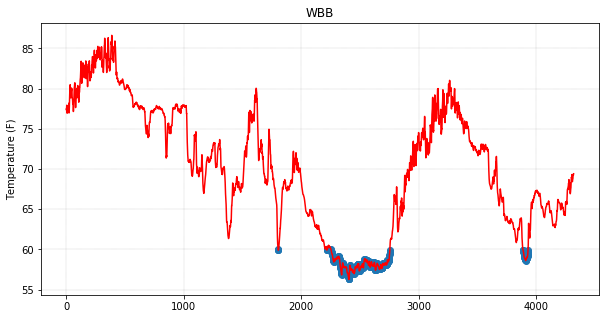

In [53]:
plt.figure(figsize=[10,5])
plt.plot(temperature, color='red')

plt.ylabel('Temperature (F)')
plt.title('WBB')

plt.grid(linestyle='--', color='grey', linewidth=.2)

# Highlight the points where temperature dropped below 60 degrees F.
plt.scatter(np.argwhere(temperature<60), temperature[np.argwhere(temperature<60)])

> ### Question: 
What does the `np.argwhere()` do?

In [57]:
# print out the argwhere output and make sure you know what it does...
#np.argwhere(temperature<60)

# 🗓 Datetime

This graphic is nice, but we would really like to see the dates on the x axis.

But`dates` is a list of strings! It would be really nice to convert those dates to something Python understood as dates.

Fortunatly, Python has some built-in tools for converting strings to `datetime` objects.

[Reference: Python datetime string formater](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [58]:
# Import Python's datetime module
from datetime import datetime

In [59]:
# Get a date from the list
date0 = dates[0]
print(date0)

# Convert the string date to a datetime object
new_date = datetime.strptime(date0, '%m/%d/%Y %H:%M MDT')
new_date

09/07/2019 10:00 MDT


datetime.datetime(2019, 9, 7, 10, 0)

To convert all the values in the dates list, we will use a condensed `for loop` or [list comprehensions](https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3). 

We can use list comprehension to convert all the values in the list `dates`.

    new_list = [x for x in iterable]

In [61]:
# List comprehension example: convert all items in a list to upper case
old_list = ['hi', 'bye', 'stop', 'go']
print(old_list)
new_list = [x.upper() for x in old_list]
print(new_list)

['hi', 'bye', 'stop', 'go']
['HI', 'BYE', 'STOP', 'GO']


In [62]:
formated_dates = np.array([datetime.strptime(i, '%m/%d/%Y %H:%M MDT') for i in dates])

In [63]:
print(dates)
print(formated_dates)

['09/07/2019 10:00 MDT' '09/07/2019 10:01 MDT' '09/07/2019 10:02 MDT' ...
 '09/10/2019 09:58 MDT' '09/10/2019 09:59 MDT' '09/10/2019 10:00 MDT']
[datetime.datetime(2019, 9, 7, 10, 0) datetime.datetime(2019, 9, 7, 10, 1)
 datetime.datetime(2019, 9, 7, 10, 2) ...
 datetime.datetime(2019, 9, 10, 9, 58)
 datetime.datetime(2019, 9, 10, 9, 59)
 datetime.datetime(2019, 9, 10, 10, 0)]


Now that we have the dates in a python-readable format, we can plot our weather observations against temperature.


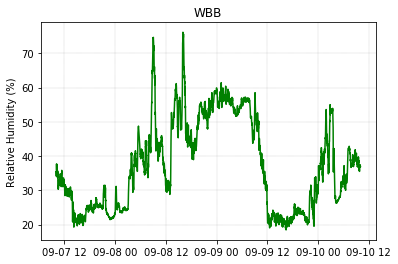

In [64]:
plt.plot(formated_dates, relative_humidity, color='green')

plt.ylabel('Relative Humidity (%)')
plt.title('WBB')

plt.grid(linestyle='--', color='grey', linewidth=.2)

# Use matplotlib the _Customizable_ way

### Twin Axis
What if we want to plot Temperature and Relative Humidity on the same axis...

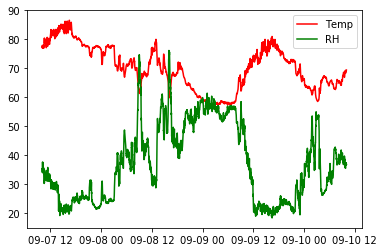

In [65]:
plt.plot(formated_dates, temperature, 'r', label='Temp')
plt.plot(formated_dates, relative_humidity, 'g', label="RH")
plt.legend()

This is fine, but the temperature and humidity range of values are not similar. Wouldn't it be nice if there were two different y axes? We can accomplish this with a little bit more formatting.

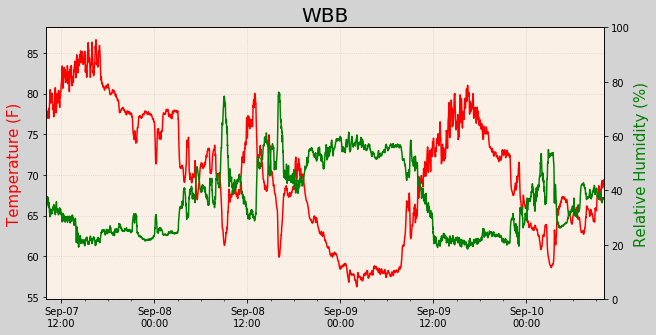

In [69]:
# Explicitly create the `fig` and `ax1` figure objects
fig, ax1 = plt.subplots(figsize=[10,5], facecolor='lightgrey')

# Plot Temperature on ax1
ax1.plot(formated_dates, temperature, 'r')
ax1.set_ylabel('Temperature (F)', color='r', fontsize=15)

# Create ax2 and plot Relative Humidity
ax2 = ax1.twinx() # make ax2 share the x axis
ax2.plot(formated_dates, relative_humidity, 'g')
ax2.set_ylabel('Relative Humidity (%)', color='g', fontsize=15)
ax2.set_ylim([0,100])

# Add a title
plt.title('WBB', fontsize=20)

# Modify date axis format. 
# You can learn how to do this with some internet searches.
from matplotlib.dates import DateFormatter, HourLocator
ax1.xaxis.set_major_formatter(DateFormatter('%b-%d\n%H:%M'))
ax1.xaxis.set_major_locator(HourLocator(range(0,24,12)))
ax1.xaxis.set_minor_locator(HourLocator(range(0,24,3)))

ax1.grid(linestyle=':', alpha=.5) # alpha is transparency

ax1.set_facecolor('linen')

# Set the xlim as the first and last date
plt.xlim(formated_dates[0], formated_dates[-1]);

# To save the figure, uncomment the next line
#plt.savefig('my_wbb_figure')

# More about datetime

The timdelta submodule can be very useful for doing math operations on dates.

Also, there is some important details for formating dates in this section.

> Personal preference tip: I like to use variables with `DATE` in all caps to indicate it is a python datetime object. For dates that are a string, I like to name variable as `date` in lowercase.

In [1]:
# import two different submodules
from datetime import datetime, timedelta

In [7]:
# Create a new date, the first of this year
# This follows the format `datetime(year, month, day, hour, minute, second)`. Only year, month, and date is required
my_DATE = datetime(2019, 1, 1)
my_DATE

datetime.datetime(2019, 1, 1, 0, 0)

How many days has it been since the begining of the year?

In [6]:
now = datetime.now()
now

datetime.datetime(2019, 9, 11, 14, 23, 43, 264239)

In [8]:
now - my_DATE

datetime.timedelta(days=253, seconds=51823, microseconds=264239)

In [17]:
time_diff = now - my_DATE
print('{} days and {:.2f} hours'.format(time_diff.days, time_diff.seconds/3600))

253 days and 14.40 hours


## Make a list of dates incrementing by day

In [30]:
# Given a start and an end date, make a list of all the days in between
sDATE = datetime(2019, 1, 1)
eDATE = datetime(2019, 2, 1)

days = (eDATE-sDATE).days

DATES = [sDATE + timedelta(days=i) for i in range(days)]

In [31]:
DATES

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0),
 datetime.datetime(2019, 1, 6, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime(2019, 1, 8, 0, 0),
 datetime.datetime(2019, 1, 9, 0, 0),
 datetime.datetime(2019, 1, 10, 0, 0),
 datetime.datetime(2019, 1, 11, 0, 0),
 datetime.datetime(2019, 1, 12, 0, 0),
 datetime.datetime(2019, 1, 13, 0, 0),
 datetime.datetime(2019, 1, 14, 0, 0),
 datetime.datetime(2019, 1, 15, 0, 0),
 datetime.datetime(2019, 1, 16, 0, 0),
 datetime.datetime(2019, 1, 17, 0, 0),
 datetime.datetime(2019, 1, 18, 0, 0),
 datetime.datetime(2019, 1, 19, 0, 0),
 datetime.datetime(2019, 1, 20, 0, 0),
 datetime.datetime(2019, 1, 21, 0, 0),
 datetime.datetime(2019, 1, 22, 0, 0),
 datetime.datetime(2019, 1, 23, 0, 0),
 datetime.datetime(2019, 1, 24, 0, 0),
 datetime.datetime(2019, 1, 25, 0, 0),
 datetime.datetime(2019, 1, 26, 0,

---
---

# 2-D Plots in `matplotlib.pyplot` (Chapter 12)

**Objective**: Introduce you to visualizing 2-dimensional datasets with `matplotlib`.

The best way to learn how to make matplotlib graphics (and programing in general) is to see how something is done, try it yourself, read the documentation, and then make some change to do what you want. If you don't know how to do something, Google it. 99% of the time someone else had the exact same question.

You might hear the term **raster** a lot. Raster simply refers to an image that represents a 2D dataset. The two images above are rasters.

To start off, become familiar with a few basic methods for plotting 2D data. We will practice with a small 2D array of random data.

Reference: [numpy.random.random](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)  

### Generate Random Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some random 2D data (random numbers between 0 and 1).
rand = np.random.random([5,5])

print('Random array shape:', np.shape(rand))
print(rand)

Random array shape: (5, 5)
[[0.23702893 0.70606107 0.49877433 0.15873889 0.83513185]
 [0.77338292 0.25702375 0.2503875  0.00729924 0.10447016]
 [0.84916745 0.61774553 0.22425354 0.93639246 0.77920338]
 [0.34722977 0.63258213 0.77586953 0.59952525 0.28470998]
 [0.54421326 0.76630828 0.85741048 0.73825503 0.76738319]]


### Generate Rasters with `imshow` and `pcolormesh`

`plt.imshow()` and `plt.pcolormesh()` are two methods to create a raster image of 2D data. They assigns a color for every value in the 2D grid. The two are slightly different. `imshow()` can plot RGB arrays and `pcolormesh` can plot irregularly spaced grids. Don't worry too much about the differences for now.

The default color scale is [viridis](https://www.youtube.com/watch?time_continue=147&v=xAoljeRJ3lU), but this can be changed with the `cmap=` argument. 

Reference: [matplotlib color map names](https://matplotlib.org/examples/color/colormaps_reference.html)  
Note: to reverse the color map, add `_r` to the end the name. For example, to reverse `cmap='Blues'` you would do `cmap='Blues_r'`

Immediately after the `plt.imshow()` function, you can add a colorbar with `plt.colorbar()`

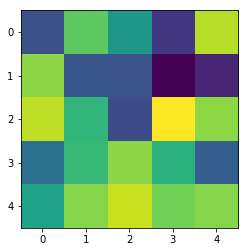

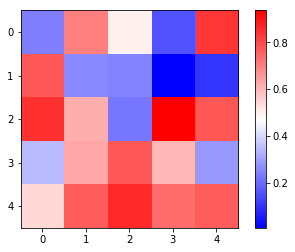

In [3]:
# Plot data with imshow
plt.figure(1)
plt.imshow(rand)

# Use a different color map and add a colorbar
plt.figure(2)
plt.imshow(rand, cmap='bwr')
plt.colorbar()

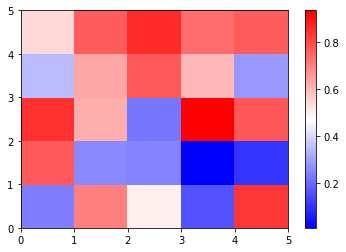

In [4]:
# Plot data with pcolormesh
plt.pcolormesh(rand, cmap='bwr')
plt.colorbar()

# notice how pcolormesh and imshow are upside-down from each other (look at the y axis)

### Generate Contour Plots and Filled Contours
Contours are lines of equal value, just like a topographic map. It doesn't look too pretty for a random dataset, but you'll see how useful it is later.

Contours can be lines `plt.contour()` or filled contours `plt.contourf()`. You can specify which levels to contour with the `levels=` argument.

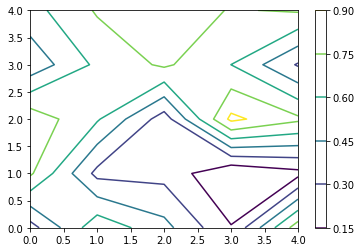

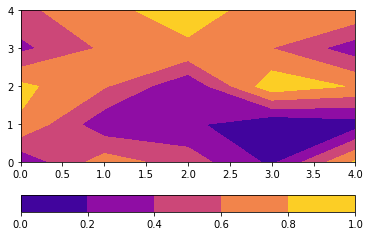

In [5]:
# Plot data with contours
plt.figure(1)
plt.contour(rand)
plt.colorbar()

# Color fill for specific levels and add a *horizontal* colorbar
plt.figure(2)
plt.contourf(rand, levels=np.arange(0,1.2,.2), cmap='plasma')
plt.colorbar(orientation='horizontal')

### Generate Wind Barbs
Wind barbs are one way to display vector data. In the case of wind, there is an east-west component (U) and north-south component (V). The number of flags corresponds to the wind's speed and points in the direction the wind is blowing.

(-1, 5)

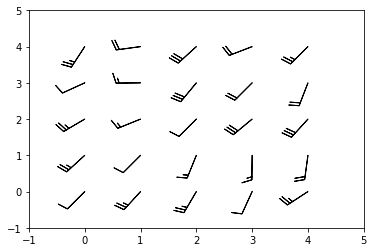

In [6]:
# Wind barbs (U and V compoents). V is transposed for visual effect
plt.barbs(rand*25, np.transpose(rand*25))

plt.xlim([-1,5])
plt.ylim([-1,5])

---
# Projectile Motion
A classical physics problem is to find the angle a projectile should be launched to achieve the maximum distance.

Reference: [Range of a projectile (Wikipedia)](https://en.wikipedia.org/wiki/Range_of_a_projectile)

\begin{equation}
    d = \frac{v^2}{2g}\left(1+\sqrt{1+\frac{2gy_0}{v^2\sin^2\theta}}\right) \sin2\theta
\end{equation}

In [7]:
def proj_distance(v0, theta, y0=0):
    """
    Calculate the distance of a projectile when launched with speed v0 at angle theta.
    
    Input:
        v0    - initial velocity of the projectile when launched
        theta - angle projectile is launched (in degrees)
        y0    - the initial height of the projectile. Default is 0.
    """
    
    # Gravitational Acceleration
    g = 9.81 # m/s^2
    
    d = (v0**2)/(2*g) * (1 + np.sqrt(1 + (2*g*y0)/(v0**2*np.sin(np.deg2rad(theta))**2)))*np.sin(2*np.deg2rad(theta))
    
    return d

In [8]:
velocity = 15
angle = 30
y0 = 0

distance = proj_distance(velocity, angle, y0)

print('Projectile landed %.1f m away from initial location' % distance)
print('after being launched with velocity %.1f m/s at %.1f degrees at an initial height of %.2f m'  % (velocity, angle, y0))

Projectile landed 19.9 m away from initial location
after being launched with velocity 15.0 m/s at 30.0 degrees at an initial height of 0.00 m


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


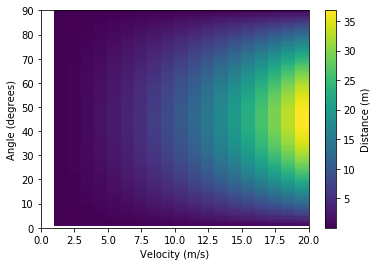

In [9]:
# Range of velocities and angles to test
velocities = np.arange(0,21,1)
angles = np.arange(0,91,1)

# Mesh grid: useful to compare all possible combinations of velocities with angles
# Print the values of v and a to see what these look like.
v, a = np.meshgrid(velocities, angles)

# Compute the distance for each
distances = proj_distance(v, a, 0)

# Plot
plt.pcolormesh(v, a, distances)
cb = plt.colorbar()
cb.set_label('Distance (m)')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Angle (degrees)");

In [10]:
print('Max distance: %.1f meters' % np.nanmax(distances))
print('--------------------------')
print('       angle: %s degrees' % a[np.where(distances==np.nanmax(distances))])
print('    velocity: %s m/s' % v[np.where(distances==np.nanmax(distances))])

Max distance: 40.8 meters
--------------------------
       angle: [45] degrees
    velocity: [20] m/s


### Exercise #1
Make the distance chart for all negative and positive angles (-90, 90) and for y0 equal to 100 m (i.e. the projectile is on top of a cliff).